# Proyek 3: Deteksi Emosi dalam Teks dengan Neural Network

## Deskripsi Proyek

Proyek ini menggunakan Neural Network untuk membangun model deteksi emosi (sentimen) dalam teks. Model ini akan menentukan apakah teks memiliki sentimen positif, negatif, atau netral. Kita akan menggunakan Recurrent Neural Network (RNN) dengan arsitektur seperti LSTM atau GRU, yang sangat cocok untuk memproses data teks.

## Langkah-langkah Proyek

### 1. Mengimpor Library dan Dataset

- Library yang dibutuhkan: pandas, numpy, tensorflow/keras, nltk.
- Dataset: Gunakan dataset ulasan seperti IMDb Reviews (tersedia di Keras) atau dataset publik lainnya.

### 2. Pra-pemrosesan Data

- Bersihkan teks dengan menghapus simbol, angka, dan karakter khusus.
- Tokenisasi teks dan ubah menjadi indeks menggunakan tokenizer Keras.
- Potong atau pad teks ke panjang maksimum tertentu (misalnya, 100 kata per teks).

### 3. Representasi Data

Gunakan Embedding Layer untuk mengubah indeks token menjadi representasi vektor densitas tinggi.

### 4. Arsitektur Model Neural Network

- Gunakan lapisan Embedding sebagai input.
- Tambahkan lapisan LSTM atau GRU untuk menangkap hubungan antar kata.
- Tambahkan lapisan Dense untuk menghasilkan prediksi akhir.

### 5. Melatih Model

- Split data menjadi train dan test.
- Gunakan binary crossentropy (untuk dua kelas) atau categorical crossentropy (untuk multi-kelas) sebagai loss function.
- Optimizer: Gunakan Adam untuk konvergensi yang lebih baik.

### 6. Evaluasi Model

- Hitung metrik seperti akurasi, precision, recall, dan F1-score.
- Visualisasikan akurasi dan loss selama pelatihan.

c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 89s 212ms/step - accuracy: 0.6818 - loss: 0.5571 - val_accuracy: 0.8471 - val_loss: 0.3652
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.8867 - loss: 0.2868 - val_accuracy: 0.8303 - val_loss: 0.3823
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.8910 - loss: 0.2794 - val_accuracy: 0.8488 - val_loss: 0.3717
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 185ms/step - accuracy: 0.9272 - loss: 0.2040 - val_accuracy: 0.8463 - val_loss: 0.3798
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 191ms/step - accuracy: 0.9457 - loss: 0.1584 - val_accuracy: 0.8458 - val_loss: 0.4554
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8440 - loss: 0.4623
Akurasi Model: 0.85


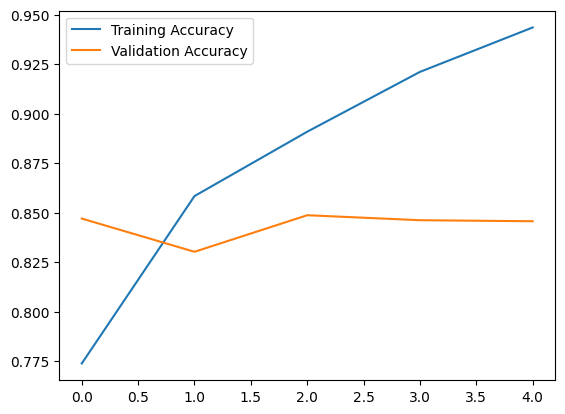

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Step 1: Load Dataset
# Contoh dataset IMDb Reviews bawaan Keras
from tensorflow.keras.datasets import imdb

vocab_size = 10000 # Ukuran kosakata
max_length = 100 # Panjang maksimum teks

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Step 2: Pad Sequences
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# Step 3: Bangun Model Neural Network
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)), # LSTM dua arah
    Dropout(0.3),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Untuk klasifikasi biner
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Latih Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Step 5: Evaluasi
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Akurasi Model: {accuracy:.2f}")

# Step 6: Visualisasi
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [3]:
# Mendapatkan kembali word index dari dataset IMDb
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Fungsi untuk mendekode teks dari indeks
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Menampilkan beberapa contoh data dari x_train dan y_train
for i in range(5):
    print(f"Teks {i+1}: {decode_review(x_train[i])}")
    print(f"Label {i+1}: {y_train[i]}")
    print()

Teks 1: critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of script their with her nobody most that with wasn't to with armed acting watch an for with heartfelt film want an
Label 1: 1

Teks 2: makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd 

In [4]:
import pandas as pd

# Buat dataframe untuk data latih
df_train = pd.DataFrame({'Review': [decode_review(x) for x in x_train], 'Sentiment': y_train})

# Buat dataframe untuk data uji
df_test = pd.DataFrame({'Review': [decode_review(x) for x in x_test], 'Sentiment': y_test})

# Tampilkan beberapa baris dari dataframe latih
df_train.head()

# Tampilkan beberapa baris dari dataframe uji
df_test.head()

,Review,Sentiment
0,the wonder own as by is sequence i i and and t...,0
1,is telling program br silliness okay and to fr...,1
2,of rukh br for and expressing stunts black tha...,1
3,of killer this as on it deborah film about his...,0
4,minute each shirley completely to was several ...,1


In [5]:
# Tampilkan jumlah kalimat yang dianalisis
jumlah_kalimat_train = x_train.shape[0]
jumlah_kalimat_test = x_test.shape[0]

print(f"Jumlah kalimat yang dianalisis dalam data latih: {jumlah_kalimat_train}")
print(f"Jumlah kalimat yang dianalisis dalam data uji: {jumlah_kalimat_test}")
print("Label 1 artinya: Ulasan Positif")
print("Label 0 artinya: Ulasan Negatif")

Jumlah kalimat yang dianalisis dalam data latih: 25000
Jumlah kalimat yang dianalisis dalam data uji: 25000
Label 1 artinya: Ulasan Positif
Label 0 artinya: Ulasan Negatif


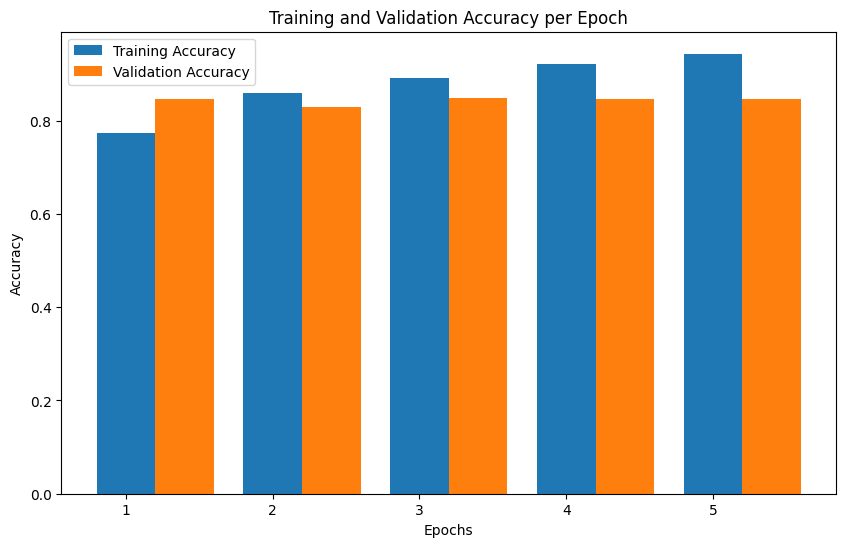

In [6]:
import matplotlib.pyplot as plt

# Data akurasi pelatihan dan validasi
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(epochs, train_accuracy, width=0.4, label='Training Accuracy', align='center')
plt.bar([epoch + 0.4 for epoch in epochs], val_accuracy, width=0.4, label='Validation Accuracy', align='center')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.show()

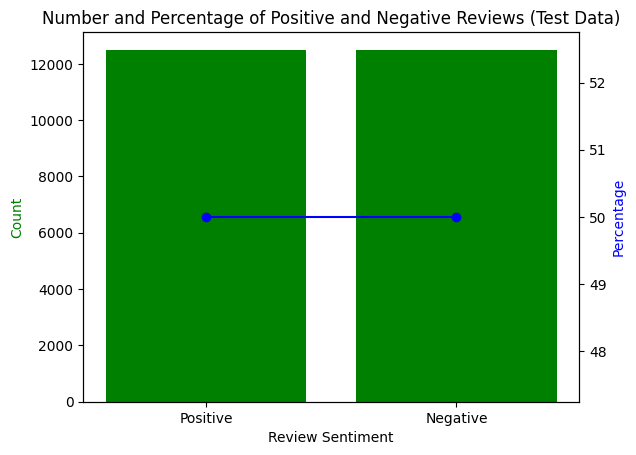

In [7]:
# Calculate the number of positive and negative reviews in the test dataset
num_positive_test = sum(y_test)
num_negative_test = len(y_test) - num_positive_test

# Calculate the percentages
percent_positive_test = (num_positive_test / len(y_test)) * 100
percent_negative_test = (num_negative_test / len(y_test)) * 100

# Create the bar plot
labels_test = ['Positive', 'Negative']
counts_test = [num_positive_test, num_negative_test]
percentages_test = [percent_positive_test, percent_negative_test]

fig_test, ax1_test = plt.subplots()

ax2_test = ax1_test.twinx()
ax1_test.bar(labels_test, counts_test, color='g')
ax2_test.plot(labels_test, percentages_test, color='b', marker='o')

ax1_test.set_xlabel('Review Sentiment')
ax1_test.set_ylabel('Count', color='g')
ax2_test.set_ylabel('Percentage', color='b')

plt.title('Number and Percentage of Positive and Negative Reviews (Test Data)')
plt.show()


## Hasil

1. Akurasi Model: Model akan mencapai akurasi yang baik (biasanya di atas 80%) pada dataset sederhana seperti IMDb Reviews.
2. Visualisasi: Grafik menunjukkan bagaiman akurasi meningkat dan loss menurun seiring dengan epoch.

Kita dapat mengadaptasi proyek ini untuk multi-kelas (misalnya, deteksi emosi seperti senang, marah, sedih) dengan mengganti fungsi aktivasi output menjadi softmax dan menggunakan categorical crossentropy sebagai loss function.

## Penjelasan Kode

### 1. Mengimpor Library dan Dataset

- tensorflow.keras: Digunakan untuk membangun dan melatih model neural network
- Sequential: Model linear dimana lapisan ditambahkan satu per satu.
- Embedding: Lapisan untuk mengubah kata (indeks) menjadi vektor numerik densitas tinggi.
- LSTM: Jenis Recurrent Neural Network (RNN) yang dirancang untuk menangkap hubungan dalam data urut.
- Droput: Lapisan untuk mencegah overfitting dengan menghilangkan beberapa hubungan dalam data urut.
- imdb.load_data(): Mengimpo dataset IMDb Review bawaan Keras.

### 2. Parameter Dataset

- vocab_size = 10000: Hanya 10,000 kata paling sering digunakan di dataset.
- max_length = 100: Membatasi panjang setiap ulasan hingga maksimal 100 kata.
- imdb.load_data(num_words=vocab_size): Mengimpor data IMDb (ulasan film):
    - x_train: Ulasan film dalam bentuk token angka (setiap angka merepresentasikan kata).
    - y_train: Label sentimen (0 = negatif, 1 = positf).

### 3. Memastikan Panjang Data Konsisten

- pad_sequences: Memastikan semua ulasan memiliki panjang yang sama dengan max_length (100 kata).
    - padding='post': jika ulasan pendek dari 100 kata, tambahkan padding di akhir.

### 4. Membuat Model Neural Network

- Embedding: Lapisan untuk mengubah token angka menjadi vektor numerik (dimensi 128).
- Bidirectional (LSTM):
    - LSTM (Long Short-Term Memory): Menangkap hubungan urutan dalam data.
    - Bidirectional: Memproses urutan teks dari kedua arah (maju dan mundur).
    - return_sequences=True: Mengembalikan urutan output dari semua langkah waktu (berguna untuk model berlapis).
- Dropout(0.3): Menghilangkan 30% neuron secara acak untuk mencegah overfitting.
- Dense(32, activation='relu'): Lapisan feed-forward dengan 32 neuron dan fungsi aktivasi ReLU.
- Dense(1, activation='sigmoid'): Lapisan output dengan satu neuron (untuk klasifikasi biner) dan fungsi aktivasi sigmoid.

### 5. Melatih Model

- binary_crossentropy: Fungsi loss untuk klasifikasi biner.
- optimizer='adam': Optimizer yang efisien untuk mempercepat konvergensi (menuju pusat).
- metrics=['accuracy']: Metrik evaluasi selama pelatihan.
- epochs=5: Jumlah iterasi penuh melalui dataset.
- batch_size=64: Memproses 64 contoh data sekaligus selama pelatihan.

### 6. Evaluasi Model

- model.evaluate: Mengukur loss dan akurasi model pada data uji.
- Output akurasi ditampilkan dengan format 2 desimal.

### 7. Visualisasi Hasil Pelatihan

- history.history: Menyimpan data akurasi dan loss selama pelatihan.
- Grafik membantu menganalisis apakah model mengalami overfitting atau underfitting.

### Output

1. Akurasi: Model akan memberikan akurasi pada data uji, misalnya 88%.
2. Grafik Akurasi: Menunjukkan tren akurasi dan validasi dari waktu ke waktu (per epoch).